**선형 SVM의 하이퍼파라미터**

AttributeError: 'Axes' object has no attribute 'set_xlable'

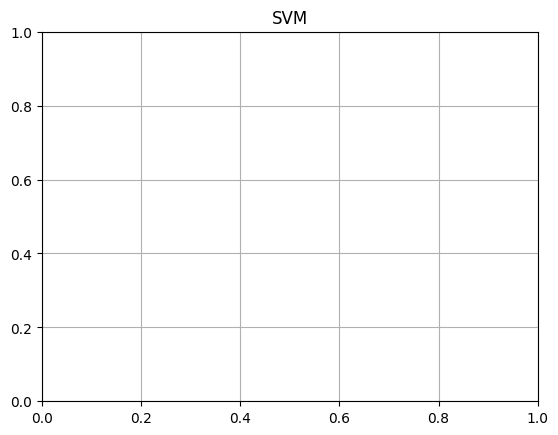

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# 데이터를 생성합니다
X,y = make_classification(
    n_samples=1250, n_features=4, n_informative=2, n_redundant=2, random_state=42)
train_X, test_X, train_y, test_y = train_test_split(X,y,random_state=42)

 # C값의 범위를 설정합니다(여기서는 1e-5,1e-4,1e-3,0.01,0.1,1,10,100,1000,10000 으로 설정)
C_list = [10 ** i for i in range(-5, 5)]

# 그래프 작성용 빈 리스트를 준비합니다.
svm_train_accuracy=[]
svm_test_accuracy=[]
log_train_accuracy=[]
log_test_accuracy=[]

for C in C_list:
  model1 = LinearSVC(C=C, random_state=42)
  model1.fit(train_X, train_y)
  svm_train_accuracy.append(model1.score(train_X, train_y))
  svm_test_accuracy.append(model1.score(test_X, test_y))

  model2 = LogisticRegression(C=C, random_state=42)
  model2.fit(train_X, train_y)

  log_train_accuracy.append(model2.score(train_X, train_y))
  log_test_accuracy.append(model2.score(test_X, test_y))

  # 그래프를 플롯합니다
  # semilogx()는 x의 스케일을 10의 x승의 스케일로 변경합니다

  fig = plt.figure()
  plt.subplots_adjust(wspace=0.4, hspace=0.4)
  ax =  fig.add_subplot(1,1,1)
  ax.grid(True)
  ax.set_title("SVM")
  ax.set_xlable("C")
  ax.set_ylable("accuracy")
  ax.semilogx(C_list, svm_train_accuracy, label="accuracy of train_data")
  ax.semilogx(C_list, svm_test_accuracy, label="accuracy of test_data")
  ax.legend()
  ax.plot()
  plt.show()
  fig2 = plt.figure()
  ax2 = fig2.add_subplot(1,1,1)
  ax2.grid(True)
  ax2.set_tittle("LogisticRegression")
  ax2.set_xlabel("C")
  ax2.set_ylabel("accuracy")
  ax2.semilogx(C_list, log_train_accuracy, label="accuracy of train_data")
  ax2.semilogx(C_list, log_test_accuracy, label="accuracy of test_data")
  ax2.legend()
  ax2.plot()
  plt.show()

**비선형 SVM의 하이퍼파라미터**

In [ ]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_gaussian_quantiles
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline

# 데이터를 생성합니다
X,y = make_gaussian_quantiles(n_samples=1250, n_features=2, random_state=42)
train_X, test_X, train_y, test_y = train_test_split(X,y,random_state=42)

 # C값의 범위를 설정합니다(여기서는 1e-5,1e-4,1e-3,0.01,0.1,1,10,100,1000,10000 으로 설정)
C_list = [10 ** i for i in range(-5, 5)]

# 그래프 작성용 빈 리스트를 준비합니다.
train_accuracy=[]
test_accuracy=[]

for C in C_list:
  model = SVC(C=C)
  model.fit(train_X, train_y)
  train_accuracy.append(model.score(train_X, train_y))
  train_accuracy.append(model.score(test_X, test_y))

# 그래프를 플롯합니다
# semilogx()는 x의 스케일을 10의 x승의 스케일로 변경합니다

plt.semilogx(C_list, train_accuracy, label="accuracy of train_data")
plt.semilogx(C_list, test_accuracy, label="accuracy of test_data")

plt.title("accuracy with changing C")
plt.xlabel("C")
plt.ylabel("accuracy")
plt.legend()
plt.show()

**랜덤 포레스트의 random_state에 따른 분류의 정확도 차**

ValueError: x and y must have same first dimension, but have shapes (100,) and (0,)

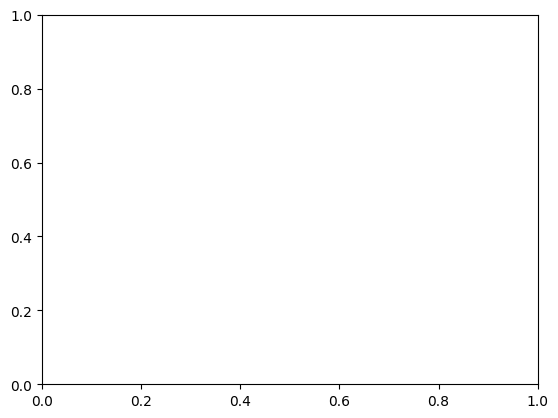

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

# 데이터를 생성합니다
X,y = make_classification(
    n_samples=1000, n_features=4, n_informative=3, n_redundant=0, random_state=42
)
train_X, test_X, train_y, test_y = train_test_split(X,y,random_state=42)

# r_seeds 값의 범위를 지정합니다(0~99)
r_seeds = [i for i in range(100)]

# 정확도를 저장하는 빈 리스트를 만듭니다
accuracy = []

# random_state을 바꾸면서 모델을 학습시킵니다

for seed in r_seeds:
  model = RandomForestClassifier(random_state=seed)
  model.fit(train_X, train_y)

plt.plot(r_seeds, accuracy)
plt.xlabel("seed")
plt.ylabel("accuracy")
plt.title("accuracy by changing seed")
plt.show()